In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from datetime import datetime
import talib as ta

In [2]:

df = pd.read_json(r'../pk-freqtrade/freqtrade/user_data/data/binance/ALGO_BTC-5m.json')
df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']

# df['symbol'] = 'BTCUSDT'
# df['source'] = 'binance'
# df['resolution'] = '5m'
df['time'] = pd.to_datetime(df['timestamp'], unit='ms', utc=False)
df.index = df['time']
# df = df[['time', 'symbol', 'source', 'resolution', 'open', 'high', 'low', 'close', 'volume']]
# df.to_csv (r'./data/binance/BTC_USDT-5m.csv', index = None)
# df.set_index('time')



In [12]:
# pd.Timestamp('now').floor('D') + pd.Timedelta(-7, unit='D')

# start_time = pd.Timestamp('now').floor('D') + pd.Timedelta(-7, unit='D')

start_time = pd.Timestamp('now') + pd.Timedelta(-1, unit='D')
# start_time
ddf = df.loc[df['time'] >= start_time]
# ddf

,timestamp,open,high,low,close,volume,time
time,,,,,,,
2021-05-07 00:00:00,1620345600000,0.000027,0.000028,0.000027,0.000028,53975.0,2021-05-07 00:00:00
2021-05-07 00:05:00,1620345900000,0.000028,0.000028,0.000027,0.000028,109447.0,2021-05-07 00:05:00
2021-05-07 00:10:00,1620346200000,0.000028,0.000028,0.000028,0.000028,220537.0,2021-05-07 00:10:00
2021-05-07 00:15:00,1620346500000,0.000028,0.000028,0.000028,0.000028,97767.0,2021-05-07 00:15:00
2021-05-07 00:20:00,1620346800000,0.000028,0.000028,0.000028,0.000028,26344.0,2021-05-07 00:20:00
...,...,...,...,...,...,...,...
2021-05-14 13:30:00,1620999000000,0.000028,0.000028,0.000028,0.000028,243303.0,2021-05-14 13:30:00
2021-05-14 13:35:00,1620999300000,0.000028,0.000028,0.000028,0.000028,239936.0,2021-05-14 13:35:00
2021-05-14 13:40:00,1620999600000,0.000028,0.000028,0.000028,0.000028,85717.0,2021-05-14 13:40:00


<ipython-input-6-2b3f5e10848d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['rsi'] = ta.RSI(ddf['close'], 21)


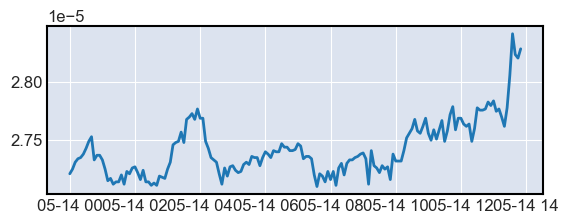

In [6]:




# start_time = datetime.strptime('2021-05-12', '%Y-%m-%d')
# pd.Timestamp('now').floor('D') + pd.Timedelta(-7, unit='D')
start_time = pd.Timestamp('now').floor('D') #+ pd.Timedelta(-7, unit='D')
# start_time = datetime.strptime('2021-05-01', '%d/%m/%y %H:%M:%S')
ddf = df.loc[df['time'] >= start_time]

ddf['rsi'] = ta.RSI(ddf['close'], 21)

# fig, ax = plt.subplots()
# ax.plot(ddf['time'], ddf['close'])
plt.figure()
plt.subplot(211)
plt.plot(ddf['time'], ddf['close'])

# plt.subplot(221)
# plt.plot(ddf['time'], ddf['rsi'])
# ax.set(xlabel='time', ylabel='close',
#        title='About as simple as it gets, folks')
# ax.grid()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# fig.autofmt_xdate()

# fig.savefig("test.png")
plt.show()

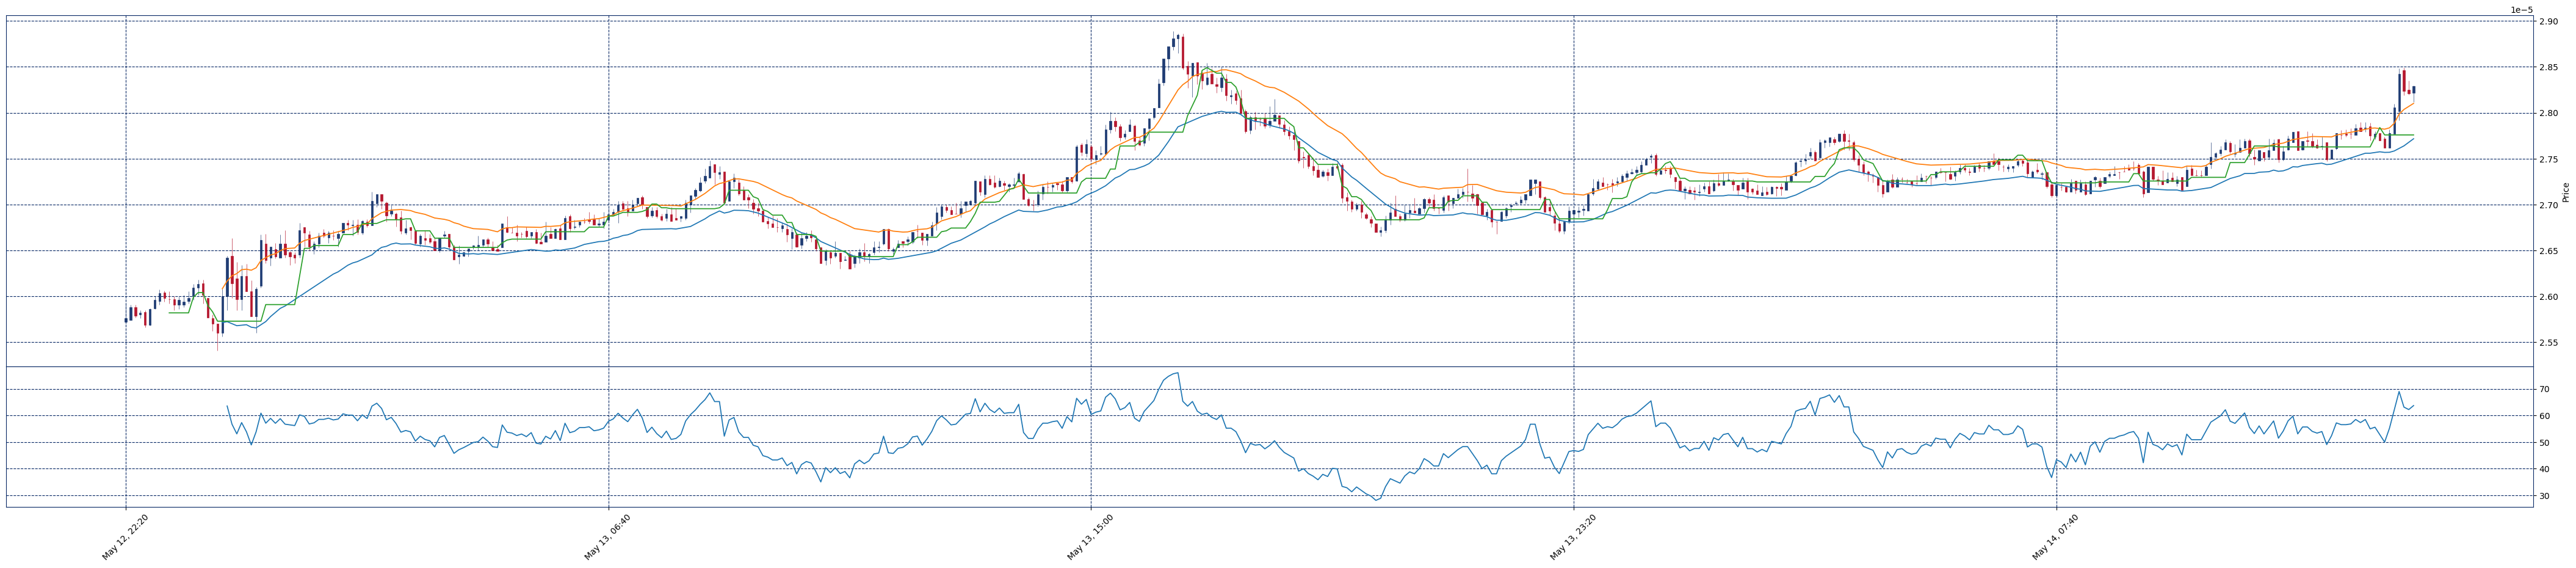

In [88]:
 import mplfinance as mpf
#  fig = plt.figure(facecolor='#07000d')


start_time = pd.Timestamp('now') + pd.Timedelta(-2, unit='D')
# start_time
ddf = df.loc[df['time'] >= start_time]

# start_time = datetime.strptime('2021-05-14', '%Y-%m-%d')
# # start_time = datetime.strptime('2021-05-01', '%d/%m/%y %H:%M:%S')
# ddf = df.loc[df['time'] >= start_time]

# ddf['rsi'] = ta.RSI(ddf['close'], 21)

        
# ***************************************************************************

ema_len = 21
swing_low_len = 3

close_ema = ta.EMA(dataframe['close'], ema_len)

# olhc4 = (ddf['high'] + ddf['low'] + ddf['open'] + ddf['high']) / 4

highs_ema = ta.EMA(dataframe['high'], ema_len)
lows_ema = ta.EMA(dataframe['low'], ema_len)
high_low_range = highs_ema - lows_ema

band_low = close_ema - high_low_range
band_high = close_ema + high_low_range

rsi = ta.RSI(dataframe['close'], ema_len)

# recent_lows = ta.SMA(dataframe['low'], 3)
swing_lows = dataframe["close"].rolling(window=swing_low_len, closed="right").min()
# prev_closes = dataframe["close"].rolling(window=5, closed="right").min()
# swing_highs = dataframe["close"].rolling(window=10, closed="right").min()


# ***************************************************************************

apds = [ 
    # mpf.make_addplot(ema),
    # mpf.make_addplot(under_ema)

    mpf.make_addplot(band_low),
    mpf.make_addplot(band_high),
    mpf.make_addplot(swing_lows * 1.005),
    # mpf.make_addplot(prev_lows * (1 + 0.004)),
    # mpf.make_addplot(prev_highs),
    # mpf.make_addplot(prev_closes * (1 + 0.004)),

    mpf.make_addplot(rsi, panel=1)
        #  mpf.make_addplot(low_signal,type='scatter',markersize=200,marker='^'),
        #  mpf.make_addplot(high_signal,type='scatter',markersize=200,marker='v'),
       ]

mpf.plot(ddf, addplot=apds, type='candle',style='starsandstripes', figratio=(5,1), figscale=2)


In [68]:
s = pd.Series(range(5))
s.rolling(window=2).min()

0    NaN
1    0.0
2    1.0
3    2.0
4    3.0
dtype: float64

In [59]:
import json

user_data_folder = '../pk-freqtrade/freqtrade/user_data'
backtest_results_folder = '{}/backtest_results'.format(user_data_folder)


with open('{}/.last_result.json'.format(backtest_results_folder)) as f:
  latest_backtest_file = json.load(f)['latest_backtest']


with open('{}/{}'.format(backtest_results_folder, latest_backtest_file)) as f:
  trades = json.load(f)["strategy"]["PKBStrategy"]["trades"]

trades

'amount': 3654970.76023392,
  'open_date': '2021-04-17 14:55:00+00:00',
  'close_date': '2021-04-17 15:00:00+00:00',
  'open_rate': 2.736e-05,
  'close_rate': 2.8510270270270265e-05,
  'fee_open': 0.001,
  'fee_close': 0.001,
  'trade_duration': 5,
  'profit_ratio': 0.03996004,
  'profit_abs': 4.0,
  'sell_reason': 'roi',
  'initial_stop_loss_abs': 2.3256e-05,
  'initial_stop_loss_ratio': -0.15,
  'stop_loss_abs': 2.3256e-05,
  'stop_loss_ratio': -0.15,
  'min_rate': 2.736e-05,
  'max_rate': 2.895e-05,
  'is_open': False,
  'open_timestamp': 1618671300000.0,
  'close_timestamp': 1618671600000.0},
 {'pair': 'ALGO/BTC',
  'stake_amount': 100.0,
  'amount': 3466204.50606586,
  'open_date': '2021-04-17 15:05:00+00:00',
  'close_date': '2021-04-17 15:35:00+00:00',
  'open_rate': 2.885e-05,
  'close_rate': 2.9196546546546542e-05,
  'fee_open': 0.001,
  'fee_close': 0.001,
  'trade_duration': 30,
  'profit_ratio': 0.00999001,
  'profit_abs': 1.0,
  'sell_reason': 'roi',
  'initial_stop_loss_a